# Data Exploration

In [53]:
import pandas as pd

# Load the FoodieBay dataset
data = pd.read_csv('FoodieBay.csv')

# Check the structure of the dataset (columns and data types)
data.info()

# Display the first few rows of the dataset to get a sense of the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.50,3.8
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,NaN,18,4.00,3.9
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.80,4.3
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.00,3.7


In [54]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 url                       0
address                   0
name                      0
phone                   884
location                  0
rest_type                 0
cuisines                 18
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dtype: int64


# Data Preprocessing

In [55]:
# 1. Handle Missing Values
# Fill missing numerical values with the mean
numerical_cols = ["ave_cost_for_two", "ave_review_ranking"]
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing categorical values with a placeholder
data["dish_liked"].fillna("Not specified", inplace=True)

# 2. Convert Categorical Variables to Numerical Format (One-Hot Encoding)
# Create dummy variables for categorical columns, except 'name'
categorical_cols = ["location", "listed_in_type", "listed_in_city"]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 3. Ensure Correct Data Types
# Ensure "ave_cost_for_two" and "ave_review_ranking" are in the correct data types
data["ave_cost_for_two"] = data["ave_cost_for_two"].astype(float)
data["ave_review_ranking"] = data["ave_review_ranking"].astype(float)

# 4. Clean and Preprocess Other Features (not performed in this example)

# Display the preprocessed dataset
data.head()


,url,address,name,phone,rest_type,cuisines,menu_item,online_order,book_table,ave_cost_for_two,...,listed_in_city_Lavelle Road,listed_in_city_MG Road,listed_in_city_Malleshwaram,listed_in_city_Marathahalli,listed_in_city_New BEL Road,listed_in_city_Old Airport Road,listed_in_city_Rajajinagar,listed_in_city_Residency Road,listed_in_city_Sarjapur Road,listed_in_city_Whitefield
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Cafe,Cafe,[],No,No,700.0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Quick Bites,"Burger, Continental, Fast Food",[],Yes,No,400.0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Quick Bites,"South Indian, Healthy Food",[],Yes,No,200.0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Yes,Yes,1200.0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,Cafe,"Cafe, Tea",[],Yes,No,250.0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
print(data.head())

                                                 url  \
0  https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1  https://www.zomato.com/bangalore/the-burger-pl...   
2  https://www.zomato.com/bangalore/millet-mama-b...   
3  https://www.zomato.com/bangalore/red-onion-sha...   
4  https://www.zomato.com/bangalore/chaiywaala-da...   

                                             address                 name  \
0  173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1  2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2  Next To Surana College, South End Circle, Basa...          Millet Mama   
3  Money Chambers Double Road, Shanti Nagar, Bang...            Red Onion   
4  Shop 67, 69, 70, Inside Ramaiah Campus, New BE...  Chaiywaala Da Dhaba   

                              phone      rest_type  \
0  +91 9886986111\r\n+91 8550051111           Cafe   
1                    +91 9108974600    Quick Bites   
2  +91 7411918648\r\n+91 9986975625   

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Columns: 141 entries, url to listed_in_city_Whitefield
dtypes: float64(3), int64(1), object(10), uint8(127)
memory usage: 9.1+ MB


# Data Analysis and Insights

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the number of restaurants that offer table booking and analyze its impact on ratings.
table_booking_counts = data['book_table'].value_counts()
print("Number of Restaurants Offering Table Booking:")
print(table_booking_counts)

Number of Restaurants Offering Table Booking:
No     36036
Yes     4094
Name: book_table, dtype: int64


In [59]:
# Analyze the impact of table booking on ratings
table_booking_ratings = data.groupby('book_table')['rate'].mean()
print("\nImpact of Table Booking on Ratings:")
print(table_booking_ratings)


Impact of Table Booking on Ratings:
book_table
No     3.591944
Yes    4.111225
Name: rate, dtype: float64


In [60]:
# 2. Calculate the number of restaurants that offer online ordering and analyze its impact on ratings.
online_order_counts = data['online_order'].value_counts()
print("\nNumber of Restaurants Offering Online Ordering:")
print(online_order_counts)



Number of Restaurants Offering Online Ordering:
Yes    24559
No     15571
Name: online_order, dtype: int64


In [61]:
# Analyze the impact of online ordering on ratings
online_order_ratings = data.groupby('online_order')['rate'].mean()
print("\nImpact of Online Ordering on Ratings:")
print(online_order_ratings)


Impact of Online Ordering on Ratings:
online_order
No     3.579349
Yes    3.692300
Name: rate, dtype: float64


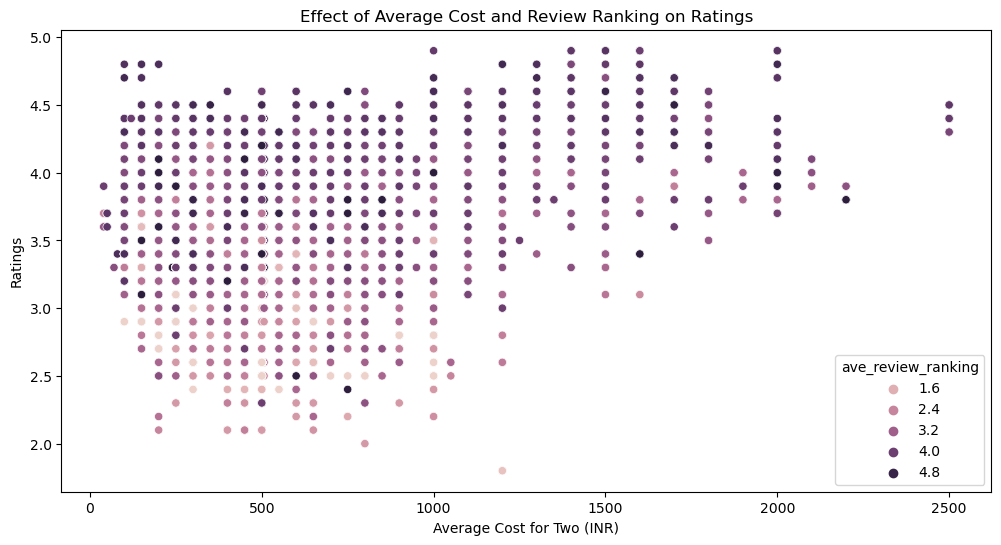

In [62]:
# 3. Analyze the effect of average cost for two and average customer review ranking on overall ratings.
# Scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='ave_cost_for_two', y='rate', hue='ave_review_ranking')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Ratings')
plt.title('Effect of Average Cost and Review Ranking on Ratings')
plt.show()

In [63]:
# Calculate the correlation between 'ave_cost_for_two' and 'rate'
correlation_cost_rate = data[['ave_cost_for_two', 'rate']].corr().loc['ave_cost_for_two', 'rate']

# Calculate the correlation between 'ave_review_ranking' and 'rate'
correlation_ranking_rate = data[['ave_review_ranking', 'rate']].corr().loc['ave_review_ranking', 'rate']

print(f"Correlation between average cost for two and rating: {correlation_cost_rate:.2f}")
print(f"Correlation between average customer review ranking and rating: {correlation_ranking_rate:.2f}")


Correlation between average cost for two and rating: 0.39
Correlation between average customer review ranking and rating: 0.47


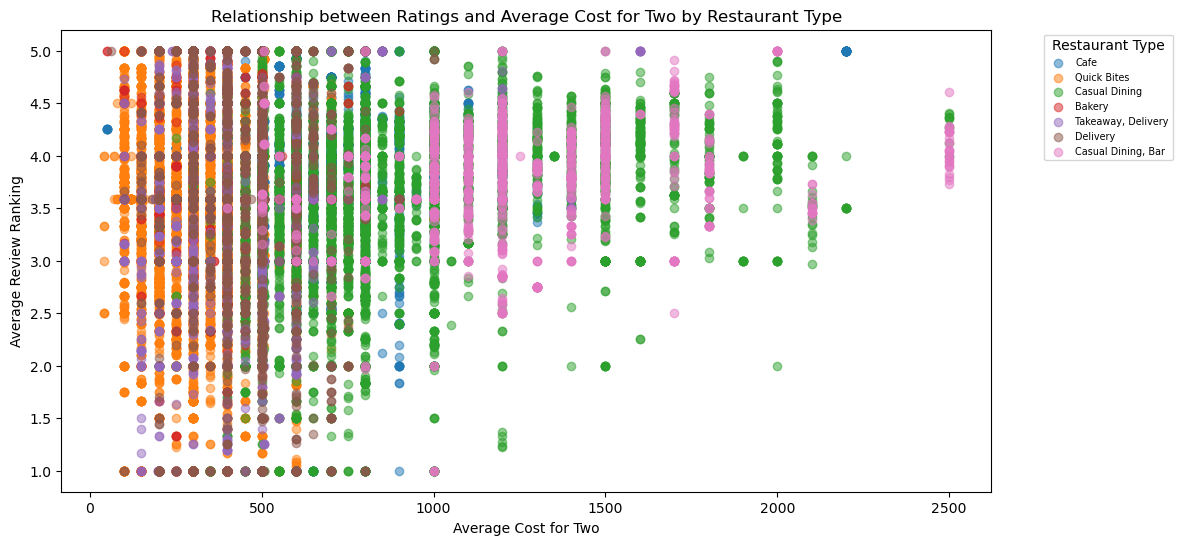

In [64]:
#4. Explore how ratings and average cost for two vary among restaurant types.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'rest_type' and 'ave_review_ranking' columns are used for this analysis
restaurant_types = data['rest_type'].unique()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through each restaurant type and plot ratings vs. average cost
for rest_type in restaurant_types:
    subset = data[data['rest_type'] == rest_type]
    ax.scatter(subset['ave_cost_for_two'], subset['ave_review_ranking'], label=rest_type, alpha=0.5)

# Customize the plot
ax.set_xlabel('Average Cost for Two')
ax.set_ylabel('Average Review Ranking')
ax.set_title('Relationship between Ratings and Average Cost for Two by Restaurant Type')
ax.legend(loc='upper right', fontsize='x-small', title='Restaurant Type', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()


In [66]:
#5. Generate additional insights about restaurants, cities, and cuisines
#Finding the Best and Worst-Performing Restaurants based on Ratings
# Sort the dataset by 'rate' column in descending order to find the best-performing restaurants
best_restaurants = data.sort_values(by='rate', ascending=False)

# Display the top 10 best-performing restaurants
print("Top 10 Best-Performing Restaurants:")
print(best_restaurants[['name', 'rate']].head(10))

# Display the bottom 10 worst-performing restaurants
worst_restaurants = data.sort_values(by='rate', ascending=True)
print("\nTop 10 Worst-Performing Restaurants:")
print(worst_restaurants[['name', 'rate']].head(10))


Top 10 Best-Performing Restaurants:
                                 name  rate
20805  Asia Kitchen By Mainland China   4.9
32224  Asia Kitchen By Mainland China   4.9
5578                         Flechazo   4.9
4693   Asia Kitchen By Mainland China   4.9
13649                    Punjab Grill   4.9
10791       AB's - Absolute Barbecues   4.9
20297       AB's - Absolute Barbecues   4.9
30192                        Flechazo   4.9
25068  Asia Kitchen By Mainland China   4.9
33190       AB's - Absolute Barbecues   4.9

Top 10 Worst-Performing Restaurants:
                                   name  rate
36253  Alibi - Maya International Hotel   1.8
2342   Alibi - Maya International Hotel   1.8
15601  Alibi - Maya International Hotel   1.8
19663  Alibi - Maya International Hotel   1.8
5897   Alibi - Maya International Hotel   1.8
4890                            Bhagini   2.0
34136                           Bhagini   2.0
33342                     Mast Kalandar   2.1
18063                       

In [67]:
#Finding the Most Popular Cuisines
# Split the 'cuisines' column to count the occurrence of each cuisine
cuisine_counts = data['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_counts.head(10))


Top 10 Most Popular Cuisines:
North Indian    18421
Chinese         13854
South Indian     8080
Fast Food        6472
Biryani          6278
Cafe             3875
Continental      3564
Beverages        2587
Italian          2405
Desserts         2172
dtype: int64


# Visualization

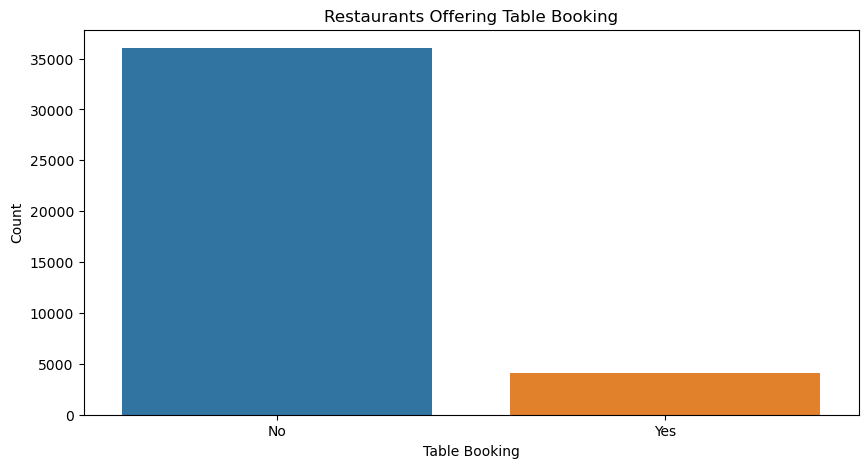

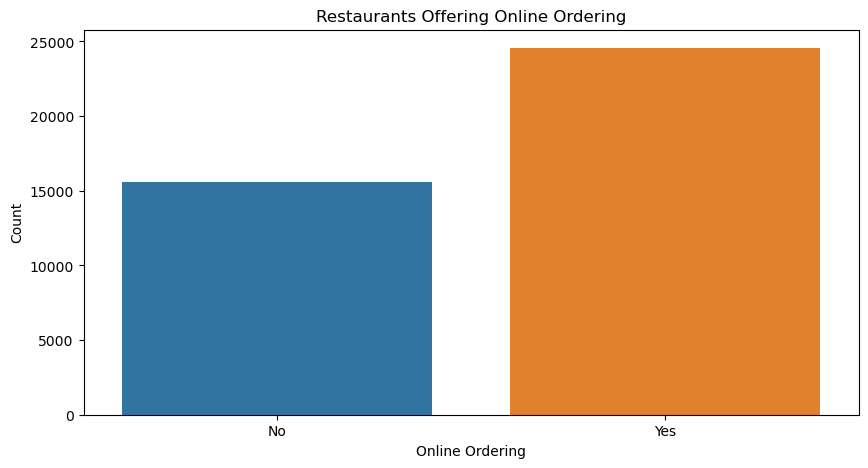

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for table booking
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='book_table')
plt.title('Restaurants Offering Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Count')
plt.show()

# Bar plot for online ordering
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='online_order')
plt.title('Restaurants Offering Online Ordering')
plt.xlabel('Online Ordering')
plt.ylabel('Count')
plt.show()


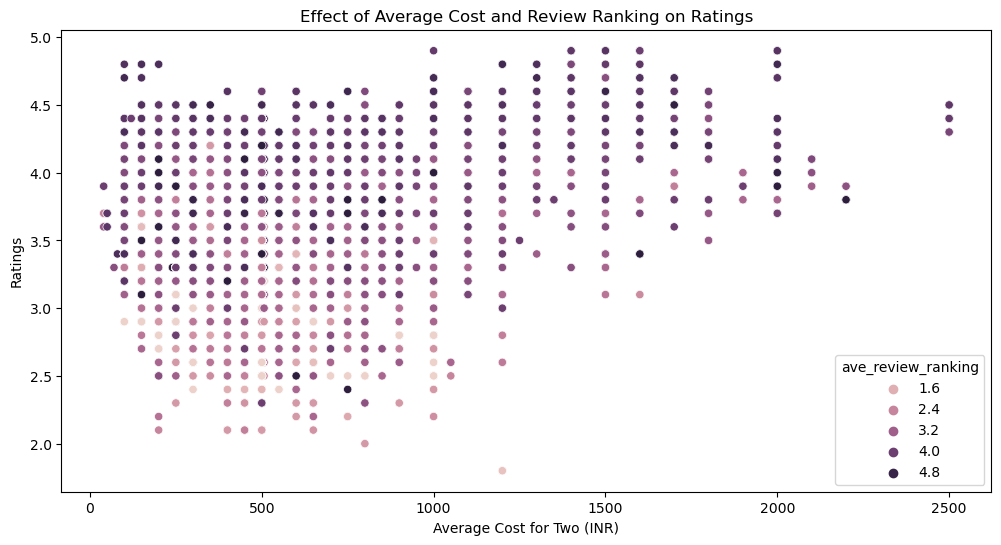

In [69]:
#Scatter Plot for Average Cost vs. Ratings with Review Ranking as Hue:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='ave_cost_for_two', y='rate', hue='ave_review_ranking')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Ratings')
plt.title('Effect of Average Cost and Review Ranking on Ratings')
plt.show()


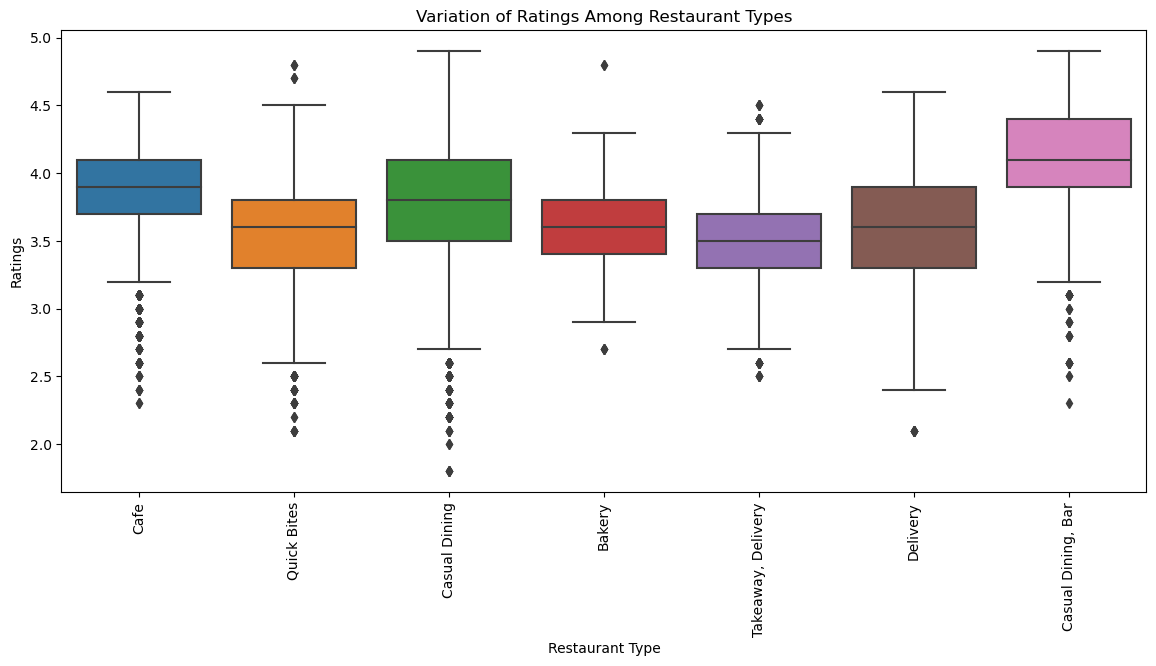

In [70]:
#Box Plot for Ratings vs. Restaurant Types:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='rest_type', y='rate')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Type')
plt.ylabel('Ratings')
plt.title('Variation of Ratings Among Restaurant Types')
plt.show()


C:\Users\hy\AppData\Local\Temp\ipykernel_10896\2054472055.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


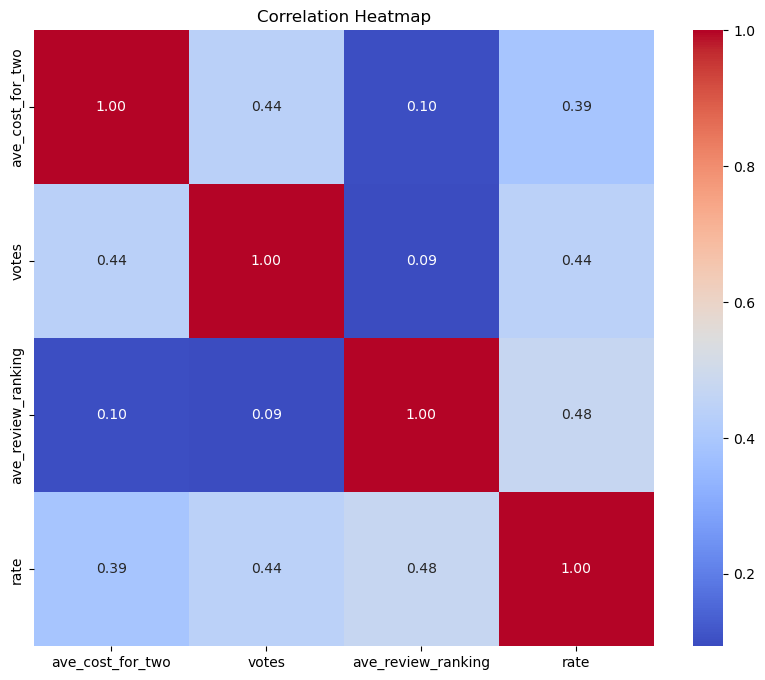

In [139]:
#Heatmap to Correlate Features (e.g., Numerical Columns):
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


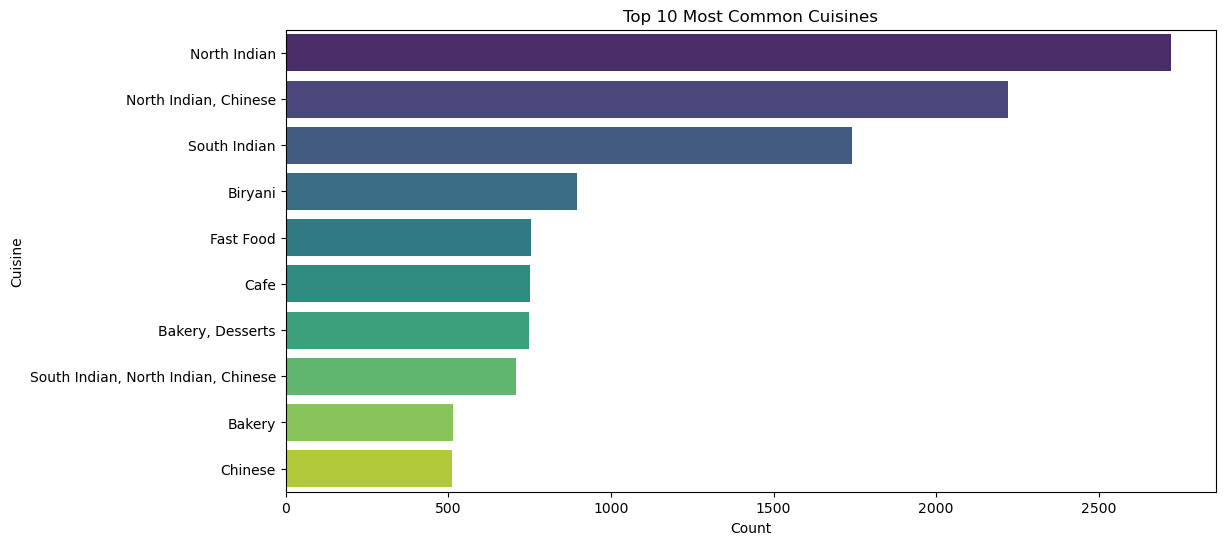

In [72]:
#Bar Plot for the Most Common Cuisines:
plt.figure(figsize=(12, 6))
top_cuisines = data['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.show()


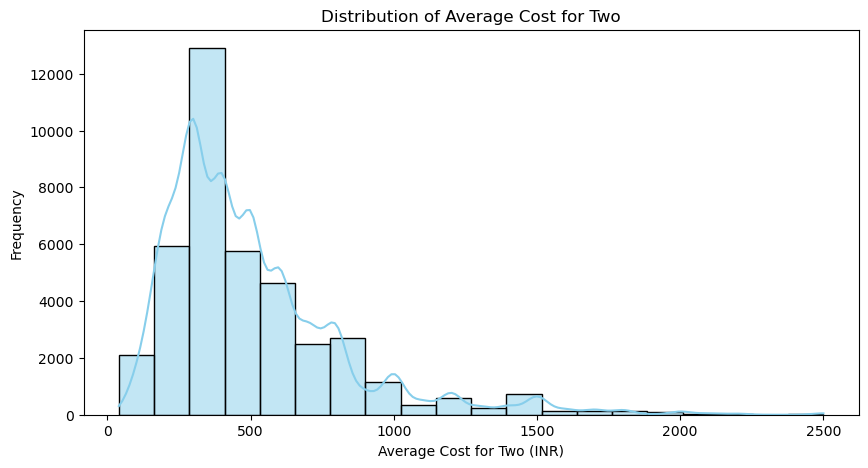

In [73]:
#Histogram for Average Cost Distribution:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='ave_cost_for_two', bins=20, kde=True, color='skyblue')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Cost for Two')
plt.show()


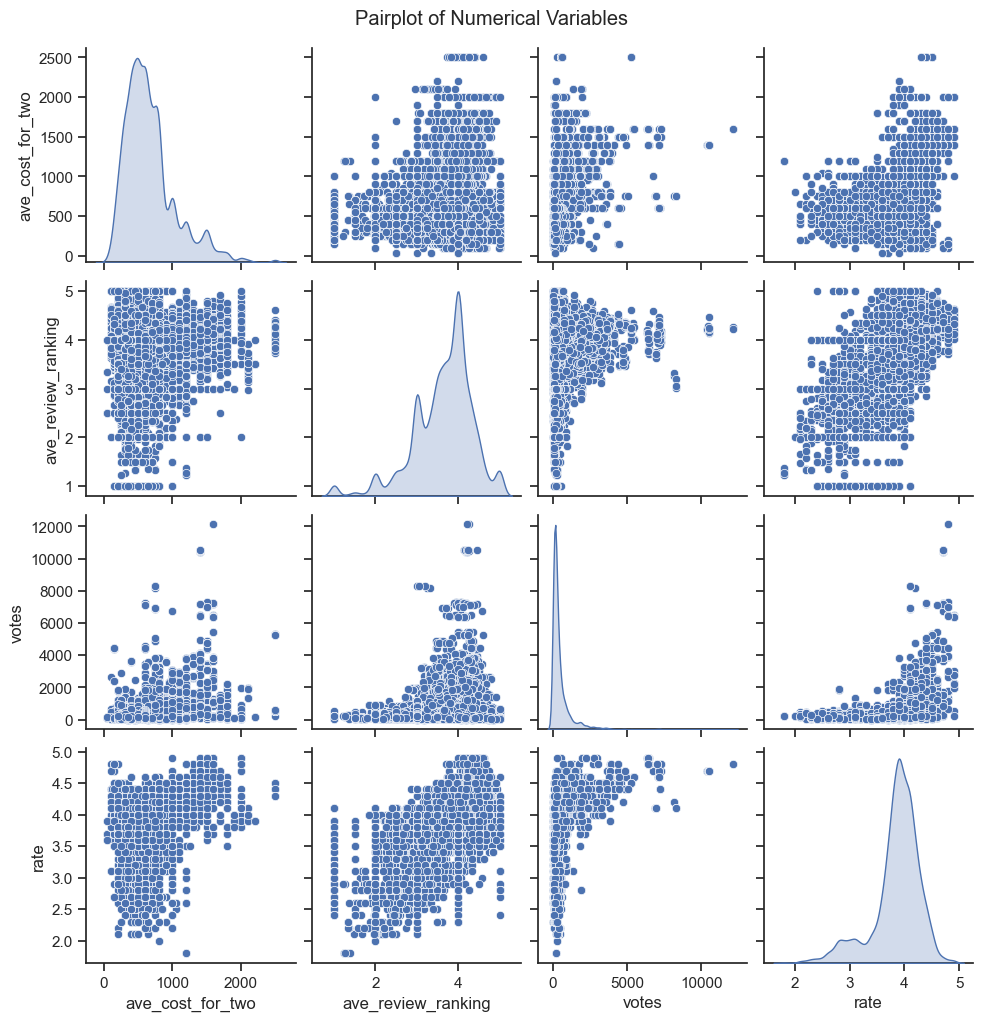

In [24]:
#Pairplot for Numerical Variables:
sns.pairplot(data=df[['ave_cost_for_two', 'ave_review_ranking', 'votes', 'rate']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


# Machine Learning

In [2]:
#Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


In [4]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('FoodieBay.csv')

# Handle Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Option 1: Remove rows with missing values
df.dropna(inplace=True)

# Data Types
# Ensure that data types are appropriate for each column
# Example: Convert a column to numeric (if it's supposed to be numeric)
# df['numeric_column'] = pd.to_numeric(df['numeric_column'], errors='coerce')

# Data Consistency
# Check for and resolve data inconsistencies
# Example: Removing duplicate entries
df.drop_duplicates(inplace=True)


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16870 entries, 3 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 16870 non-null  object 
 1   address             16870 non-null  object 
 2   name                16870 non-null  object 
 3   phone               16870 non-null  object 
 4   location            16870 non-null  object 
 5   rest_type           16870 non-null  object 
 6   cuisines            16870 non-null  object 
 7   menu_item           16870 non-null  object 
 8   listed_in_type      16870 non-null  object 
 9   listed_in_city      16870 non-null  object 
 10  online_order        16870 non-null  object 
 11  book_table          16870 non-null  object 
 12  ave_cost_for_two    16870 non-null  float64
 13  dish_liked          16870 non-null  object 
 14  votes               16870 non-null  int64  
 15  ave_review_ranking  16870 non-null  float64
 16  rate

In [5]:
df.dtypes

url                    object
address                object
name                   object
phone                  object
location               object
rest_type              object
cuisines               object
menu_item              object
listed_in_type         object
listed_in_city         object
online_order           object
book_table             object
ave_cost_for_two      float64
dish_liked             object
votes                   int64
ave_review_ranking    float64
rate                  float64
dtype: object

In [7]:
df = df.drop(['url','address','name','phone','location','cuisines','dish_liked','menu_item'], axis=1)

In [10]:
df.head()

,rest_type,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate
3,Casual Dining,Delivery,Brigade Road,Yes,Yes,1200.0,550,4.800000,4.3
4,Cafe,Dine-out,New BEL Road,Yes,No,250.0,67,3.000000,3.7
5,Cafe,Cafes,Kammanahalli,Yes,No,650.0,140,3.500000,3.8
7,Quick Bites,Dine-out,Brigade Road,Yes,No,250.0,204,3.497167,4.1
8,Quick Bites,Delivery,BTM,Yes,No,300.0,127,1.854651,2.9


In [133]:
df.columns

Index(['rest_type', 'listed_in_type', 'listed_in_city', 'online_order',
       'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking',
       'rate'],
      dtype='object')

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting features and target variable
X = df.drop(columns=['rate'])  # Features (excluding 'rate' which is the target variable)
y = df['rate']  # Target variable

# Encode categorical variables using one-hot encoding
categorical_columns = ['rest_type','listed_in_type', 'listed_in_city', 'online_order', 'book_table']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (13496, 46)
X_test shape: (3374, 46)
y_train shape: (13496,)
y_test shape: (3374,)


# Supervised Machine Learning

In [15]:
#Train all possible regression models for selecting best two

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

# Initialize lists to store model names and evaluation results
model_names = []
mse_scores = []
r2_scores = []

# Loop through each regression model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Append model name and evaluation results to lists
    model_names.append(type(model).__name__)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print evaluation results for each model
for i in range(len(models)):
    print(f"{model_names[i]} Results:")
    print(f"Mean Squared Error: {mse_scores[i]:.2f}")
    print(f"R-squared (R2) Score: {r2_scores[i]:.2f}")
    print()


LinearRegression Results:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.47

Ridge Results:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.47

Lasso Results:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

ElasticNet Results:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

DecisionTreeRegressor Results:
Mean Squared Error: 0.04
R-squared (R2) Score: 0.78

RandomForestRegressor Results:
Mean Squared Error: 0.03
R-squared (R2) Score: 0.84

GradientBoostingRegressor Results:
Mean Squared Error: 0.08
R-squared (R2) Score: 0.58

SVR Results:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.22

KNeighborsRegressor Results:
Mean Squared Error: 0.06
R-squared (R2) Score: 0.67



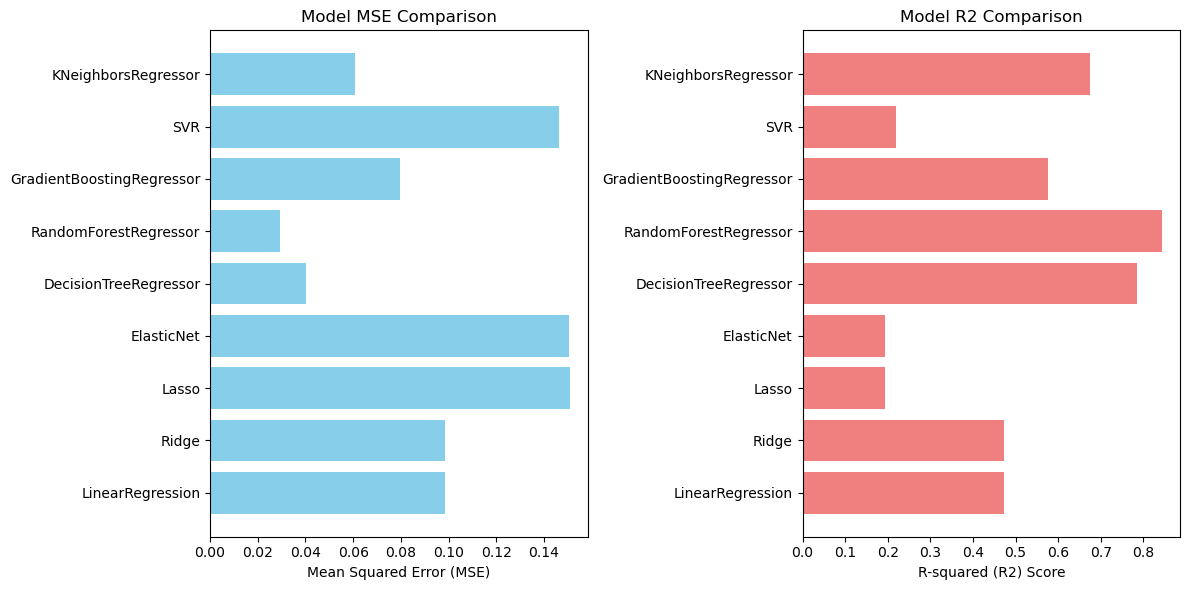

In [17]:
import matplotlib.pyplot as plt

# Create bar plots for MSE and R2 scores
plt.figure(figsize=(12, 6))

# Bar plot for Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.barh(model_names, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model MSE Comparison')

# Bar plot for R-squared (R2) Score
plt.subplot(1, 2, 2)
plt.barh(model_names, r2_scores, color='lightcoral')
plt.xlabel('R-squared (R2) Score')
plt.title('Model R2 Comparison')

plt.tight_layout()
plt.show()


In [16]:
#Two best model according two above result comparision

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the top-performing models
random_forest_model = RandomForestRegressor(random_state=42)
decision_tree_model = DecisionTreeRegressor()

# Train the Random Forest Regressor
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)

# Train the Decision Tree Regressor
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)

# Evaluate the Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate the Decision Tree Regressor
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Print evaluation results for the two best models
print("Random Forest Regressor Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared (R2) Score: {rf_r2:.2f}")
print()

print("Decision Tree Regressor Results:")
print(f"Mean Squared Error: {dt_mse:.2f}")
print(f"R-squared (R2) Score: {dt_r2:.2f}")


Random Forest Regressor Results:
Mean Squared Error: 0.03
R-squared (R2) Score: 0.84

Decision Tree Regressor Results:
Mean Squared Error: 0.04
R-squared (R2) Score: 0.78


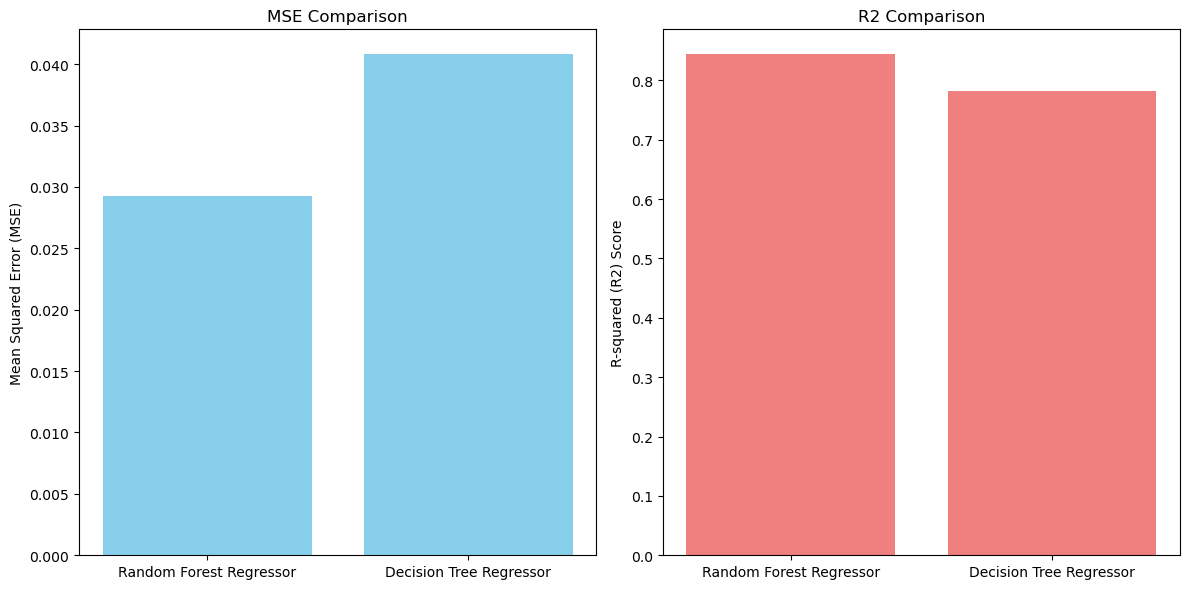

In [18]:
# Graphical comparision of selected models
import matplotlib.pyplot as plt

# Model names and corresponding MSE and R2 scores
model_names = ["Random Forest Regressor", "Decision Tree Regressor"]
mse_scores = [rf_mse, dt_mse]
r2_scores = [rf_r2, dt_r2]

# Create bar plots for MSE and R2 scores
plt.figure(figsize=(12, 6))

# Bar plot for Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores, color='skyblue')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison')

# Bar plot for R-squared (R2) Score
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='lightcoral')
plt.ylabel('R-squared (R2) Score')
plt.title('R2 Comparison')

plt.tight_layout()
plt.show()


# Insights into the strengths and weaknesses of each model

Based on the results, here are the strengths and weaknesses of each model:

**Random Forest Regressor:**
- Strengths:
  - Lower Mean Squared Error (MSE): The Random Forest Regressor has a lower MSE (0.03) compared to the Decision Tree Regressor (0.04). This indicates that it provides more accurate predictions and better fits the data.
  - Higher R-squared (R2) Score: The Random Forest Regressor has a higher R2 score (0.84), indicating that it explains a larger proportion of the variance in the target variable. This suggests that the model captures more of the underlying patterns in the data.
  - Ensemble Learning: Random Forest is an ensemble method that combines multiple decision trees, which can help reduce overfitting and increase model generalization.

- Weaknesses:
  - Complexity: Random Forests can be computationally expensive and may have a larger memory footprint due to the ensemble of decision trees.
  - Less Interpretability: The ensemble nature of Random Forest can make it less interpretable compared to a single decision tree.

**Decision Tree Regressor:**
- Strengths:
  - Simplicity: Decision trees are simple to understand and interpret. They provide clear rules for making predictions, which can be valuable for decision-making.
  - Faster Training: Decision trees generally require less training time compared to Random Forests, as they involve fewer computations.

- Weaknesses:
  - Higher Mean Squared Error (MSE): The Decision Tree Regressor has a higher MSE (0.04) compared to the Random Forest Regressor (0.03), indicating that it may not provide predictions as accurate as the Random Forest model.
  - Lower R-squared (R2) Score: The Decision Tree Regressor has a lower R2 score (0.78) compared to the Random Forest Regressor (0.84), suggesting that it explains a smaller proportion of the variance in the target variable. This implies that it may not capture as many patterns in the data.

In summary, the Random Forest Regressor outperforms the Decision Tree Regressor in terms of predictive accuracy (lower MSE and higher R2 score). However, Decision Trees are simpler and more interpretable, making them a good choice when interpretability is a priority, and they may perform well on less complex datasets. The choice between the two models depends on the specific requirements of your problem and the trade-offs between accuracy and interpretability.

# Unsupervised Machine Learning

C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

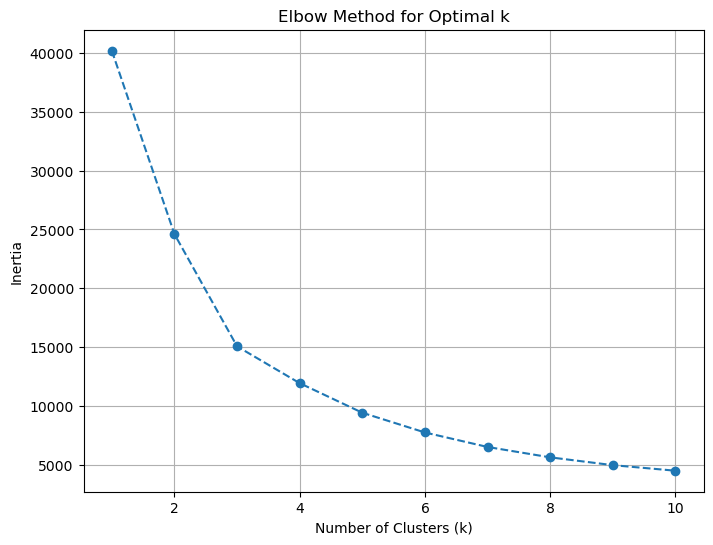

C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics


# Select the features you want to use for clustering (e.g., numerical features)
selected_features = ['ave_cost_for_two', 'votes', 'ave_review_ranking']

# Extract the selected features
X = df[selected_features]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction (optional, but can be useful)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize a list to store the inertia (within-cluster sum of squares) values
inertia = []

# Try different values of k (number of clusters) and compute inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # You can also use X_scaled instead of X_pca
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Method graph, determine the optimal number of clusters (k)
# It's the point where inertia starts to decrease at a slower rate (the "elbow" of the curve)
# In this case, let's assume k=3 as the optimal number of clusters

# Perform K-means clustering with the chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)  # You can also use X_scaled instead of X_pca

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Now, df contains the cluster labels for each data point


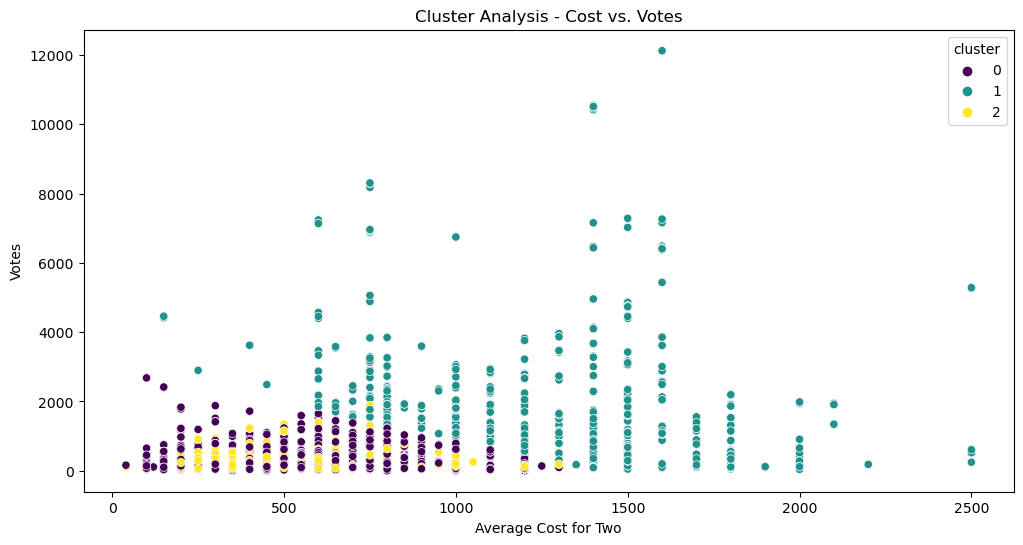

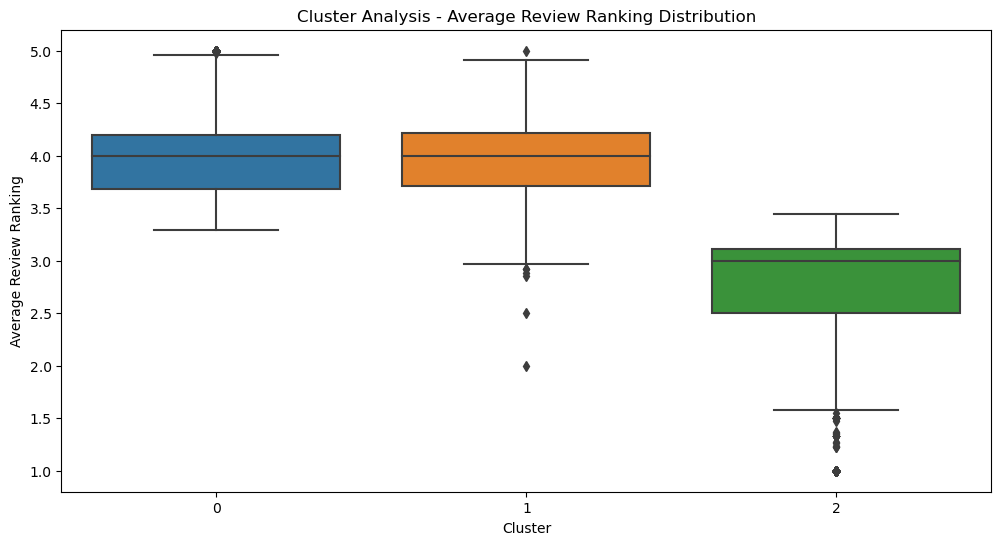

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Group Data by Clusters
clustered_data = df.groupby('cluster')

# 2. Calculate Cluster Statistics (for example, using mean)
cluster_stats = clustered_data[['ave_cost_for_two', 'votes', 'ave_review_ranking']].mean()

# 3. Visualize Clusters
# You can create scatter plots for feature comparisons
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ave_cost_for_two', y='votes', hue='cluster', palette='viridis')
plt.title('Cluster Analysis - Cost vs. Votes')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.show()

# You can also create box plots to visualize feature distributions within clusters
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cluster', y='ave_review_ranking')
plt.title('Cluster Analysis - Average Review Ranking Distribution')
plt.xlabel('Cluster')
plt.ylabel('Average Review Ranking')
plt.show()

# Repeat the above steps for other features or combinations of features as needed.
